## PI_ ANN_07fev20 - full data_keras

In [25]:
import numpy as np
import pandas as pd
import csv
# https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5

In [26]:
data = pd.read_csv(r'data32.csv', header=0)

In [27]:
data = data.drop('TX_RESP_Q010.1', axis=1)

In [28]:
data.head(3)

,CO_PROFESSOR,TT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,2017176053,1,1,4,3,4,4,2,2,3,2,3,1,0,1
1,2017282685,1,1,4,3,4,4,2,2,3,2,3,1,0,1
2,2017289663,1,1,4,3,4,4,2,2,3,2,3,1,0,1


In [29]:
data.tail(3)

,CO_PROFESSOR,TT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
6841,2017340078,0,0,2,2,3,4,1,0,3,6,6,1,0,1
6842,2017085233,0,0,2,2,3,4,1,0,3,6,6,1,0,1
6843,2017042361,0,1,4,3,2,4,2,1,2,6,5,1,0,2


In [30]:
data.shape

(6844, 15)

In [31]:
y = data.loc[:,'TT']

In [32]:
y.shape

(6844,)

In [33]:
data=data.drop(['CO_PROFESSOR'], axis=1)

In [34]:
data.head(1)

,TT,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,1,1,4,3,4,4,2,2,3,2,3,1,0,1


In [35]:
data=data.drop(['TT'], axis=1)

In [36]:
data.head(1)

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q010,TX_RESP_Q005,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q013,TX_RESP_Q014,TX_RESP_Q015,TX_RESP_Q016,TX_RESP_Q017,TX_RESP_Q018
0,1,4,3,4,4,2,2,3,2,3,1,0,1


In [37]:
data.shape

(6844, 13)

In [38]:
X=data.to_numpy()
# https://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array
X

array([[1, 4, 3, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 1],
       ...,
       [0, 2, 2, ..., 1, 0, 1],
       [0, 2, 2, ..., 1, 0, 1],
       [1, 4, 3, ..., 1, 0, 2]], dtype=int64)

In [39]:
y=y.to_numpy()

In [40]:
#Normalização dos dados de entrada -- variável explicativa
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [41]:
# Separação entre conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35)

In [42]:
#Definição da ANN e suas camadas
import keras
from keras.models import Sequential
from keras.layers import Dense
# Rede Neural -- 13 entradas e 01 saída, com 4 camadas intermediárias (hidden)
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

Using TensorFlow backend.


In [43]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
treino = model.fit(X_train, y_train, epochs=1000, batch_size=64)

Epoch 1/1000
4448/4448 [==============================] - 2s 406us/step - loss: 0.5854 - accuracy: 0.7943
Epoch 2/1000
4448/4448 [==============================] - 0s 40us/step - loss: 0.5139 - accuracy: 0.8042
Epoch 3/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.4978 - accuracy: 0.8042
Epoch 4/1000
4448/4448 [==============================] - 0s 43us/step - loss: 0.4886 - accuracy: 0.8042
Epoch 5/1000
4448/4448 [==============================] - 0s 59us/step - loss: 0.4833 - accuracy: 0.8042
Epoch 6/1000
4448/4448 [==============================] - 0s 87us/step - loss: 0.4796 - accuracy: 0.8042
Epoch 7/1000
4448/4448 [==============================] - 0s 89us/step - loss: 0.4771 - accuracy: 0.8042
Epoch 8/1000
4448/4448 [==============================] - 0s 88us/step - loss: 0.4749 - accuracy: 0.8042
Epoch 9/1000
4448/4448 [==============================] - 0s 89us/step - loss: 0.4725 - accuracy: 0.8042
Epoch 10/1000
4448/4448 [=============================

4448/4448 [==============================] - 0s 78us/step - loss: 0.3920 - accuracy: 0.8177
Epoch 79/1000
4448/4448 [==============================] - 0s 79us/step - loss: 0.3913 - accuracy: 0.8228
Epoch 80/1000
4448/4448 [==============================] - 0s 79us/step - loss: 0.3907 - accuracy: 0.8190
Epoch 81/1000
4448/4448 [==============================] - 0s 87us/step - loss: 0.3910 - accuracy: 0.8204
Epoch 82/1000
4448/4448 [==============================] - 0s 90us/step - loss: 0.3899 - accuracy: 0.8183
Epoch 83/1000
4448/4448 [==============================] - 0s 87us/step - loss: 0.3903 - accuracy: 0.8190
Epoch 84/1000
4448/4448 [==============================] - 0s 75us/step - loss: 0.3900 - accuracy: 0.8219
Epoch 85/1000
4448/4448 [==============================] - 0s 61us/step - loss: 0.3897 - accuracy: 0.8208
Epoch 86/1000
4448/4448 [==============================] - 0s 85us/step - loss: 0.3901 - accuracy: 0.8204
Epoch 87/1000
4448/4448 [==============================] - 0

4448/4448 [==============================] - 0s 76us/step - loss: 0.3718 - accuracy: 0.8280
Epoch 155/1000
4448/4448 [==============================] - 0s 81us/step - loss: 0.3707 - accuracy: 0.8282
Epoch 156/1000
4448/4448 [==============================] - 0s 81us/step - loss: 0.3720 - accuracy: 0.8294
Epoch 157/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3701 - accuracy: 0.8303
Epoch 158/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3714 - accuracy: 0.8282
Epoch 159/1000
4448/4448 [==============================] - 0s 43us/step - loss: 0.3703 - accuracy: 0.8305
Epoch 160/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3699 - accuracy: 0.8300
Epoch 161/1000
4448/4448 [==============================] - 0s 43us/step - loss: 0.3718 - accuracy: 0.8273
Epoch 162/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3691 - accuracy: 0.8278
Epoch 163/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 65us/step - loss: 0.3585 - accuracy: 0.8348
Epoch 231/1000
4448/4448 [==============================] - 0s 71us/step - loss: 0.3588 - accuracy: 0.8345
Epoch 232/1000
4448/4448 [==============================] - 0s 70us/step - loss: 0.3583 - accuracy: 0.8352
Epoch 233/1000
4448/4448 [==============================] - 0s 69us/step - loss: 0.3592 - accuracy: 0.8334
Epoch 234/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3566 - accuracy: 0.8368
Epoch 235/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3568 - accuracy: 0.8350
Epoch 236/1000
4448/4448 [==============================] - 0s 66us/step - loss: 0.3575 - accuracy: 0.8375
Epoch 237/1000
4448/4448 [==============================] - 0s 66us/step - loss: 0.3562 - accuracy: 0.8361 0s - loss: 0.3546 - accuracy: 
Epoch 238/1000
4448/4448 [==============================] - 0s 67us/step - loss: 0.3563 - accuracy: 0.8357
Epoch 239/1000
4448/4

4448/4448 [==============================] - 0s 65us/step - loss: 0.3501 - accuracy: 0.8381
Epoch 307/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3510 - accuracy: 0.8386
Epoch 308/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3502 - accuracy: 0.8384
Epoch 309/1000
4448/4448 [==============================] - 0s 67us/step - loss: 0.3486 - accuracy: 0.8393
Epoch 310/1000
4448/4448 [==============================] - 0s 75us/step - loss: 0.3476 - accuracy: 0.8404
Epoch 311/1000
4448/4448 [==============================] - 0s 69us/step - loss: 0.3494 - accuracy: 0.8361
Epoch 312/1000
4448/4448 [==============================] - 0s 64us/step - loss: 0.3512 - accuracy: 0.8393
Epoch 313/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3499 - accuracy: 0.8388
Epoch 314/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3494 - accuracy: 0.8368
Epoch 315/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 51us/step - loss: 0.3440 - accuracy: 0.8451
Epoch 383/1000
4448/4448 [==============================] - 0s 49us/step - loss: 0.3404 - accuracy: 0.8480
Epoch 384/1000
4448/4448 [==============================] - 0s 49us/step - loss: 0.3472 - accuracy: 0.8440
Epoch 385/1000
4448/4448 [==============================] - 0s 51us/step - loss: 0.3439 - accuracy: 0.8471
Epoch 386/1000
4448/4448 [==============================] - 0s 51us/step - loss: 0.3414 - accuracy: 0.8469
Epoch 387/1000
4448/4448 [==============================] - 0s 50us/step - loss: 0.3408 - accuracy: 0.8467
Epoch 388/1000
4448/4448 [==============================] - 0s 49us/step - loss: 0.3412 - accuracy: 0.8435
Epoch 389/1000
4448/4448 [==============================] - 0s 51us/step - loss: 0.3421 - accuracy: 0.8440
Epoch 390/1000
4448/4448 [==============================] - 0s 49us/step - loss: 0.3462 - accuracy: 0.8449
Epoch 391/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 40us/step - loss: 0.3405 - accuracy: 0.8476
Epoch 459/1000
4448/4448 [==============================] - 0s 45us/step - loss: 0.3368 - accuracy: 0.8487
Epoch 460/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3371 - accuracy: 0.8487
Epoch 461/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3377 - accuracy: 0.8451
Epoch 462/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3366 - accuracy: 0.8498
Epoch 463/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3370 - accuracy: 0.8489
Epoch 464/1000
4448/4448 [==============================] - 0s 61us/step - loss: 0.3431 - accuracy: 0.8467
Epoch 465/1000
4448/4448 [==============================] - 0s 67us/step - loss: 0.3394 - accuracy: 0.8460
Epoch 466/1000
4448/4448 [==============================] - 0s 67us/step - loss: 0.3369 - accuracy: 0.8482
Epoch 467/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 72us/step - loss: 0.3352 - accuracy: 0.8453
Epoch 535/1000
4448/4448 [==============================] - 0s 72us/step - loss: 0.3380 - accuracy: 0.8482
Epoch 536/1000
4448/4448 [==============================] - 0s 64us/step - loss: 0.3389 - accuracy: 0.8471
Epoch 537/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3393 - accuracy: 0.8464
Epoch 538/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3402 - accuracy: 0.8473
Epoch 539/1000
4448/4448 [==============================] - 0s 61us/step - loss: 0.3356 - accuracy: 0.8487
Epoch 540/1000
4448/4448 [==============================] - 0s 62us/step - loss: 0.3343 - accuracy: 0.8485
Epoch 541/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3336 - accuracy: 0.8487
Epoch 542/1000
4448/4448 [==============================] - 0s 66us/step - loss: 0.3363 - accuracy: 0.8503
Epoch 543/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 23us/step - loss: 0.3370 - accuracy: 0.8487
Epoch 611/1000
4448/4448 [==============================] - 0s 22us/step - loss: 0.3376 - accuracy: 0.8462
Epoch 612/1000
4448/4448 [==============================] - 0s 23us/step - loss: 0.3410 - accuracy: 0.8433
Epoch 613/1000
4448/4448 [==============================] - 0s 66us/step - loss: 0.3385 - accuracy: 0.8469
Epoch 614/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3364 - accuracy: 0.8509
Epoch 615/1000
4448/4448 [==============================] - 0s 22us/step - loss: 0.3376 - accuracy: 0.8478
Epoch 616/1000
4448/4448 [==============================] - 0s 22us/step - loss: 0.3378 - accuracy: 0.8494
Epoch 617/1000
4448/4448 [==============================] - 0s 22us/step - loss: 0.3359 - accuracy: 0.8491
Epoch 618/1000
4448/4448 [==============================] - 0s 22us/step - loss: 0.3358 - accuracy: 0.8512
Epoch 619/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 45us/step - loss: 0.3358 - accuracy: 0.8471
Epoch 687/1000
4448/4448 [==============================] - 0s 47us/step - loss: 0.3320 - accuracy: 0.8505
Epoch 688/1000
4448/4448 [==============================] - 0s 56us/step - loss: 0.3338 - accuracy: 0.8482
Epoch 689/1000
4448/4448 [==============================] - 0s 89us/step - loss: 0.3343 - accuracy: 0.8485
Epoch 690/1000
4448/4448 [==============================] - 0s 48us/step - loss: 0.3324 - accuracy: 0.8503
Epoch 691/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3330 - accuracy: 0.8480
Epoch 692/1000
4448/4448 [==============================] - 0s 76us/step - loss: 0.3354 - accuracy: 0.8505
Epoch 693/1000
4448/4448 [==============================] - 0s 60us/step - loss: 0.3360 - accuracy: 0.8460
Epoch 694/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3354 - accuracy: 0.8460
Epoch 695/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 48us/step - loss: 0.3359 - accuracy: 0.8473
Epoch 763/1000
4448/4448 [==============================] - 0s 41us/step - loss: 0.3306 - accuracy: 0.8525
Epoch 764/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3331 - accuracy: 0.8482
Epoch 765/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3357 - accuracy: 0.8503
Epoch 766/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3374 - accuracy: 0.8482
Epoch 767/1000
4448/4448 [==============================] - 0s 41us/step - loss: 0.3362 - accuracy: 0.8503
Epoch 768/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3346 - accuracy: 0.8500
Epoch 769/1000
4448/4448 [==============================] - 0s 41us/step - loss: 0.3330 - accuracy: 0.8471
Epoch 770/1000
4448/4448 [==============================] - 0s 41us/step - loss: 0.3300 - accuracy: 0.8496
Epoch 771/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 41us/step - loss: 0.3286 - accuracy: 0.8527
Epoch 839/1000
4448/4448 [==============================] - 0s 43us/step - loss: 0.3272 - accuracy: 0.8539
Epoch 840/1000
4448/4448 [==============================] - 0s 55us/step - loss: 0.3281 - accuracy: 0.8541
Epoch 841/1000
4448/4448 [==============================] - 0s 71us/step - loss: 0.3336 - accuracy: 0.8507
Epoch 842/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3340 - accuracy: 0.8494
Epoch 843/1000
4448/4448 [==============================] - 0s 62us/step - loss: 0.3356 - accuracy: 0.8476
Epoch 844/1000
4448/4448 [==============================] - 0s 60us/step - loss: 0.3305 - accuracy: 0.8498
Epoch 845/1000
4448/4448 [==============================] - 0s 73us/step - loss: 0.3332 - accuracy: 0.8503
Epoch 846/1000
4448/4448 [==============================] - 0s 84us/step - loss: 0.3330 - accuracy: 0.8505
Epoch 847/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 70us/step - loss: 0.3301 - accuracy: 0.8527
Epoch 915/1000
4448/4448 [==============================] - 0s 72us/step - loss: 0.3314 - accuracy: 0.8496
Epoch 916/1000
4448/4448 [==============================] - 0s 70us/step - loss: 0.3326 - accuracy: 0.8485
Epoch 917/1000
4448/4448 [==============================] - 0s 70us/step - loss: 0.3305 - accuracy: 0.8530
Epoch 918/1000
4448/4448 [==============================] - 0s 68us/step - loss: 0.3281 - accuracy: 0.8539
Epoch 919/1000
4448/4448 [==============================] - 0s 63us/step - loss: 0.3269 - accuracy: 0.8550
Epoch 920/1000
4448/4448 [==============================] - 0s 59us/step - loss: 0.3267 - accuracy: 0.8532
Epoch 921/1000
4448/4448 [==============================] - 0s 65us/step - loss: 0.3278 - accuracy: 0.8525
Epoch 922/1000
4448/4448 [==============================] - 0s 62us/step - loss: 0.3291 - accuracy: 0.8532
Epoch 923/1000
4448/4448 [==========================

4448/4448 [==============================] - 0s 44us/step - loss: 0.3301 - accuracy: 0.8530
Epoch 991/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3295 - accuracy: 0.8509
Epoch 992/1000
4448/4448 [==============================] - 0s 45us/step - loss: 0.3269 - accuracy: 0.8545
Epoch 993/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3283 - accuracy: 0.8559
Epoch 994/1000
4448/4448 [==============================] - 0s 43us/step - loss: 0.3258 - accuracy: 0.8559
Epoch 995/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3257 - accuracy: 0.8536
Epoch 996/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3264 - accuracy: 0.8516
Epoch 997/1000
4448/4448 [==============================] - 0s 44us/step - loss: 0.3247 - accuracy: 0.8548
Epoch 998/1000
4448/4448 [==============================] - 0s 42us/step - loss: 0.3245 - accuracy: 0.8552
Epoch 999/1000
4448/4448 [==========================

In [45]:
y_pred = model.predict(X_test)
# Conversão das predições
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
# Conversão da parte one hot encoded test label para resultado
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [46]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 84.5575959933222


In [47]:
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

Train on 4448 samples, validate on 2396 samples
Epoch 1/500
4448/4448 [==============================] - 0s 69us/step - loss: 0.3257 - accuracy: 0.8527 - val_loss: 0.4856 - val_accuracy: 0.8218
Epoch 2/500
4448/4448 [==============================] - 0s 50us/step - loss: 0.3242 - accuracy: 0.8577 - val_loss: 0.4873 - val_accuracy: 0.8151
Epoch 3/500
4448/4448 [==============================] - 0s 52us/step - loss: 0.3250 - accuracy: 0.8557 - val_loss: 0.4855 - val_accuracy: 0.8226
Epoch 4/500
4448/4448 [==============================] - 0s 53us/step - loss: 0.3270 - accuracy: 0.8539 - val_loss: 0.4822 - val_accuracy: 0.8214
Epoch 5/500
4448/4448 [==============================] - 0s 52us/step - loss: 0.3291 - accuracy: 0.8523 - val_loss: 0.4830 - val_accuracy: 0.8151
Epoch 6/500
4448/4448 [==============================] - 0s 53us/step - loss: 0.3298 - accuracy: 0.8521 - val_loss: 0.4871 - val_accuracy: 0.8193
Epoch 7/500
4448/4448 [==============================] - 0s 52us/step - loss

4448/4448 [==============================] - 0s 106us/step - loss: 0.3257 - accuracy: 0.8563 - val_loss: 0.4855 - val_accuracy: 0.8180
Epoch 57/500
4448/4448 [==============================] - 0s 103us/step - loss: 0.3271 - accuracy: 0.8548 - val_loss: 0.4807 - val_accuracy: 0.8243
Epoch 58/500
4448/4448 [==============================] - 0s 102us/step - loss: 0.3223 - accuracy: 0.8590 - val_loss: 0.4857 - val_accuracy: 0.8210
Epoch 59/500
4448/4448 [==============================] - 0s 104us/step - loss: 0.3231 - accuracy: 0.8568 - val_loss: 0.4894 - val_accuracy: 0.8218
Epoch 60/500
4448/4448 [==============================] - 0s 97us/step - loss: 0.3222 - accuracy: 0.8586 - val_loss: 0.4885 - val_accuracy: 0.8260
Epoch 61/500
4448/4448 [==============================] - 0s 83us/step - loss: 0.3225 - accuracy: 0.8543 - val_loss: 0.4883 - val_accuracy: 0.8230
Epoch 62/500
4448/4448 [==============================] - 0s 83us/step - loss: 0.3268 - accuracy: 0.8557 - val_loss: 0.4907 - v

Epoch 112/500
4448/4448 [==============================] - 0s 64us/step - loss: 0.3275 - accuracy: 0.8543 - val_loss: 0.4858 - val_accuracy: 0.8205
Epoch 113/500
4448/4448 [==============================] - 0s 64us/step - loss: 0.3320 - accuracy: 0.8539 - val_loss: 0.4924 - val_accuracy: 0.8097
Epoch 114/500
4448/4448 [==============================] - 0s 69us/step - loss: 0.3357 - accuracy: 0.8494 - val_loss: 0.4854 - val_accuracy: 0.8201
Epoch 115/500
4448/4448 [==============================] - 0s 72us/step - loss: 0.3286 - accuracy: 0.8539 - val_loss: 0.4830 - val_accuracy: 0.8184
Epoch 116/500
4448/4448 [==============================] - 0s 83us/step - loss: 0.3288 - accuracy: 0.8530 - val_loss: 0.4802 - val_accuracy: 0.8226
Epoch 117/500
4448/4448 [==============================] - 0s 68us/step - loss: 0.3280 - accuracy: 0.8559 - val_loss: 0.4771 - val_accuracy: 0.8264
Epoch 118/500
4448/4448 [==============================] - 0s 64us/step - loss: 0.3283 - accuracy: 0.8563 - val_

4448/4448 [==============================] - 0s 72us/step - loss: 0.3203 - accuracy: 0.8575 - val_loss: 0.4939 - val_accuracy: 0.8251
Epoch 168/500
4448/4448 [==============================] - 0s 78us/step - loss: 0.3271 - accuracy: 0.8548 - val_loss: 0.4846 - val_accuracy: 0.8205
Epoch 169/500
4448/4448 [==============================] - 0s 79us/step - loss: 0.3217 - accuracy: 0.8577 - val_loss: 0.4906 - val_accuracy: 0.8159
Epoch 170/500
4448/4448 [==============================] - 0s 71us/step - loss: 0.3229 - accuracy: 0.8557 - val_loss: 0.4802 - val_accuracy: 0.8197
Epoch 171/500
4448/4448 [==============================] - 0s 71us/step - loss: 0.3221 - accuracy: 0.8541 - val_loss: 0.4799 - val_accuracy: 0.8285
Epoch 172/500
4448/4448 [==============================] - 0s 71us/step - loss: 0.3229 - accuracy: 0.8568 - val_loss: 0.4874 - val_accuracy: 0.8230
Epoch 173/500
4448/4448 [==============================] - 0s 71us/step - loss: 0.3302 - accuracy: 0.8552 - val_loss: 0.4903 -

4448/4448 [==============================] - 0s 71us/step - loss: 0.3303 - accuracy: 0.8516 - val_loss: 0.4792 - val_accuracy: 0.8176
Epoch 223/500
4448/4448 [==============================] - 0s 64us/step - loss: 0.3276 - accuracy: 0.8539 - val_loss: 0.4847 - val_accuracy: 0.8222
Epoch 224/500
4448/4448 [==============================] - 0s 66us/step - loss: 0.3246 - accuracy: 0.8536 - val_loss: 0.4803 - val_accuracy: 0.8205
Epoch 225/500
4448/4448 [==============================] - 0s 65us/step - loss: 0.3230 - accuracy: 0.8545 - val_loss: 0.4902 - val_accuracy: 0.8139
Epoch 226/500
4448/4448 [==============================] - 0s 63us/step - loss: 0.3246 - accuracy: 0.8568 - val_loss: 0.4738 - val_accuracy: 0.8239
Epoch 227/500
4448/4448 [==============================] - 0s 68us/step - loss: 0.3252 - accuracy: 0.8566 - val_loss: 0.4908 - val_accuracy: 0.8168
Epoch 228/500
4448/4448 [==============================] - 0s 64us/step - loss: 0.3277 - accuracy: 0.8550 - val_loss: 0.4877 -

4448/4448 [==============================] - 0s 70us/step - loss: 0.3239 - accuracy: 0.8561 - val_loss: 0.4753 - val_accuracy: 0.8210
Epoch 278/500
4448/4448 [==============================] - 0s 71us/step - loss: 0.3274 - accuracy: 0.8552 - val_loss: 0.4848 - val_accuracy: 0.8201
Epoch 279/500
4448/4448 [==============================] - 0s 68us/step - loss: 0.3256 - accuracy: 0.8568 - val_loss: 0.4747 - val_accuracy: 0.8260
Epoch 280/500
4448/4448 [==============================] - 0s 63us/step - loss: 0.3219 - accuracy: 0.8563 - val_loss: 0.4790 - val_accuracy: 0.8176
Epoch 281/500
4448/4448 [==============================] - 0s 63us/step - loss: 0.3198 - accuracy: 0.8590 - val_loss: 0.4786 - val_accuracy: 0.8235
Epoch 282/500
4448/4448 [==============================] - 0s 64us/step - loss: 0.3286 - accuracy: 0.8525 - val_loss: 0.4741 - val_accuracy: 0.8251
Epoch 283/500
4448/4448 [==============================] - 0s 71us/step - loss: 0.3257 - accuracy: 0.8563 - val_loss: 0.4862 -

4448/4448 [==============================] - 0s 93us/step - loss: 0.3160 - accuracy: 0.8638 - val_loss: 0.4770 - val_accuracy: 0.8239
Epoch 333/500
4448/4448 [==============================] - 0s 94us/step - loss: 0.3168 - accuracy: 0.8624 - val_loss: 0.4762 - val_accuracy: 0.8180
Epoch 334/500
4448/4448 [==============================] - ETA: 0s - loss: 0.3169 - accuracy: 0.86 - 0s 79us/step - loss: 0.3153 - accuracy: 0.8606 - val_loss: 0.4834 - val_accuracy: 0.8134
Epoch 335/500
4448/4448 [==============================] - 0s 80us/step - loss: 0.3170 - accuracy: 0.8606 - val_loss: 0.4779 - val_accuracy: 0.8210
Epoch 336/500
4448/4448 [==============================] - 0s 81us/step - loss: 0.3181 - accuracy: 0.8606 - val_loss: 0.4787 - val_accuracy: 0.8226
Epoch 337/500
4448/4448 [==============================] - 0s 91us/step - loss: 0.3202 - accuracy: 0.8584 - val_loss: 0.4808 - val_accuracy: 0.8239
Epoch 338/500
4448/4448 [==============================] - 0s 83us/step - loss: 0.32

4448/4448 [==============================] - 0s 64us/step - loss: 0.3218 - accuracy: 0.8577 - val_loss: 0.4749 - val_accuracy: 0.8176
Epoch 387/500
4448/4448 [==============================] - 0s 63us/step - loss: 0.3170 - accuracy: 0.8608 - val_loss: 0.4876 - val_accuracy: 0.8168
Epoch 388/500
4448/4448 [==============================] - 0s 63us/step - loss: 0.3210 - accuracy: 0.8577 - val_loss: 0.4821 - val_accuracy: 0.8193
Epoch 389/500
4448/4448 [==============================] - 0s 67us/step - loss: 0.3170 - accuracy: 0.8629 - val_loss: 0.4853 - val_accuracy: 0.8193
Epoch 390/500
4448/4448 [==============================] - 0s 80us/step - loss: 0.3140 - accuracy: 0.8626 - val_loss: 0.4851 - val_accuracy: 0.8193
Epoch 391/500
4448/4448 [==============================] - 0s 75us/step - loss: 0.3218 - accuracy: 0.8602 - val_loss: 0.4816 - val_accuracy: 0.8184
Epoch 392/500
4448/4448 [==============================] - 0s 75us/step - loss: 0.3212 - accuracy: 0.8608 - val_loss: 0.4846 -

4448/4448 [==============================] - 0s 94us/step - loss: 0.3276 - accuracy: 0.8536 - val_loss: 0.4929 - val_accuracy: 0.8139
Epoch 442/500
4448/4448 [==============================] - 0s 94us/step - loss: 0.3274 - accuracy: 0.8548 - val_loss: 0.4847 - val_accuracy: 0.8168
Epoch 443/500
4448/4448 [==============================] - 0s 93us/step - loss: 0.3239 - accuracy: 0.8550 - val_loss: 0.4822 - val_accuracy: 0.8218
Epoch 444/500
4448/4448 [==============================] - 0s 83us/step - loss: 0.3214 - accuracy: 0.8595 - val_loss: 0.4747 - val_accuracy: 0.8180
Epoch 445/500
4448/4448 [==============================] - 0s 83us/step - loss: 0.3315 - accuracy: 0.8514 - val_loss: 0.4828 - val_accuracy: 0.8130
Epoch 446/500
4448/4448 [==============================] - 0s 82us/step - loss: 0.3280 - accuracy: 0.8532 - val_loss: 0.4821 - val_accuracy: 0.7997
Epoch 447/500
4448/4448 [==============================] - 0s 78us/step - loss: 0.3260 - accuracy: 0.8561 - val_loss: 0.4859 -

4448/4448 [==============================] - 0s 77us/step - loss: 0.3230 - accuracy: 0.8575 - val_loss: 0.4845 - val_accuracy: 0.8264
Epoch 497/500
4448/4448 [==============================] - 0s 82us/step - loss: 0.3206 - accuracy: 0.8599 - val_loss: 0.4798 - val_accuracy: 0.8118
Epoch 498/500
4448/4448 [==============================] - 0s 60us/step - loss: 0.3212 - accuracy: 0.8602 - val_loss: 0.4810 - val_accuracy: 0.8143
Epoch 499/500
4448/4448 [==============================] - 1s 113us/step - loss: 0.3185 - accuracy: 0.8615 - val_loss: 0.4782 - val_accuracy: 0.8214
Epoch 500/500
4448/4448 [==============================] - 0s 57us/step - loss: 0.3182 - accuracy: 0.8631 - val_loss: 0.4743 - val_accuracy: 0.8230


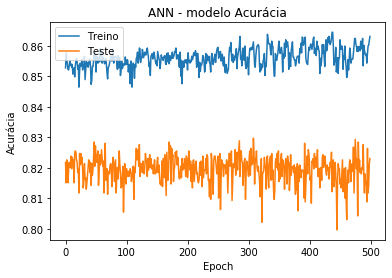

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN - modelo Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

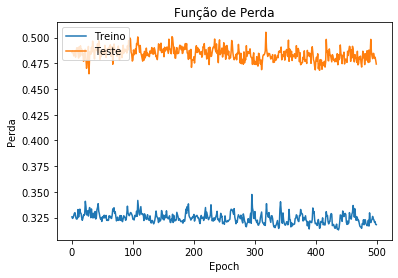

In [49]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Função de Perda') 
plt.ylabel('Perda') 
plt.xlabel('Epoch') 
plt.legend(['Treino', 'Teste'], loc='upper left') 
plt.show()

In [50]:
from sklearn.neural_network import MLPClassifier

In [51]:
model = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(10,6),random_state=1,max_iter=150)
print(model)
model.fit(X_train,y_train)
pred = model.predict(X_test)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 6), learning_rate='constant',
              learning_rate_init=0.001, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\aferr\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
print ('\n Teste usando MLP')
print ("Erro médio absoluto:", metrics.mean_absolute_error(y_test,pred))
print ("Erro médio quadrático:", metrics.mean_squared_error(y_test,pred))
print ("Erro médio raiz quadrada:", np.sqrt(metrics.mean_squared_error(y_test,pred)))


 Teste usando MLP
Erro médio absoluto: 0.1807178631051753
Erro médio quadrático: 0.1807178631051753
Erro médio raiz quadrada: 0.42510923667355816


In [53]:
confusion_matrix(y_test,pred)

array([[1931,    9],
       [ 424,   32]], dtype=int64)